In [7]:
#Package import
import os
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from utils import *

# 테이블 아키텍쳐

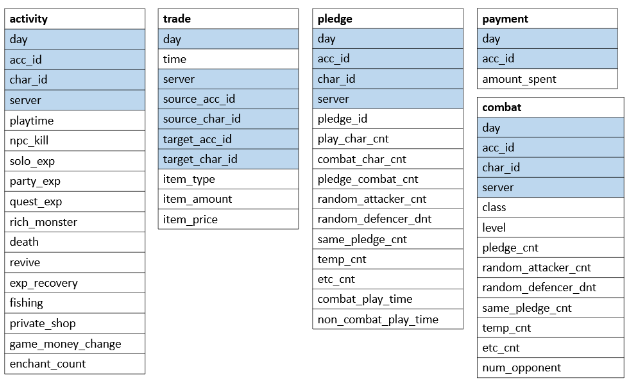

In [8]:
Image("../../pic/data_architecture.PNG")

In [9]:
#Read data
os.chdir('../../Data')
activity = pd.read_csv('train_activity.csv')
combat = pd.read_csv('train_combat.csv')
payment = pd.read_csv('train_payment.csv')
trade = pd.read_csv('train_trade.csv')
pledge = pd.read_csv('train_pledge.csv')
label= pd.read_csv('train_label.csv')

# 레벨 범주

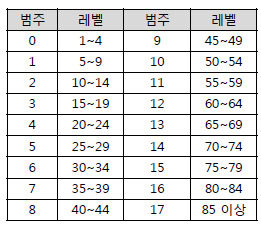

In [6]:
Image("../pic/level_label.PNG")

# 타겟팅 그룹 확인

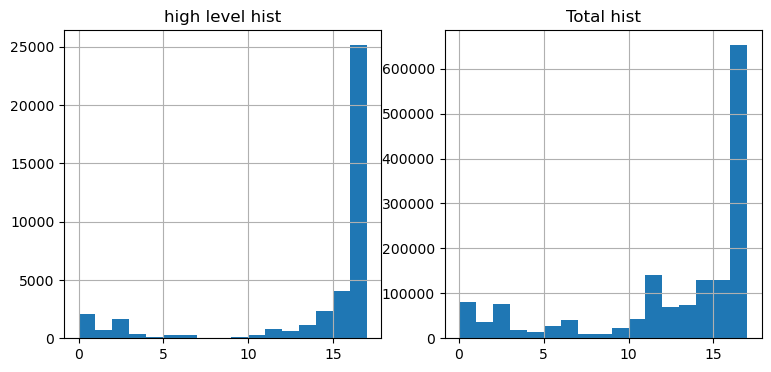

In [10]:
#acc_id별 가장 고렙들로 레벨 분포 확인해보기(전체 분포와 비교)
combat_copy = combat.copy()
combat_copy.sort_values(by=['acc_id','level'],ascending=[False,False],inplace= True, ignore_index= True)
combat_copy.drop_duplicates(subset=['acc_id'],ignore_index=True,inplace = True)
#combat_copy['level'].hist()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axs[0].hist(combat_copy['level'],bins=17)
axs[0].set_title('high level hist')
axs[0].grid(True)
axs[1].hist(combat['level'],bins=17)
axs[1].set_title('Total hist')
axs[1].grid(True)
plt.show()

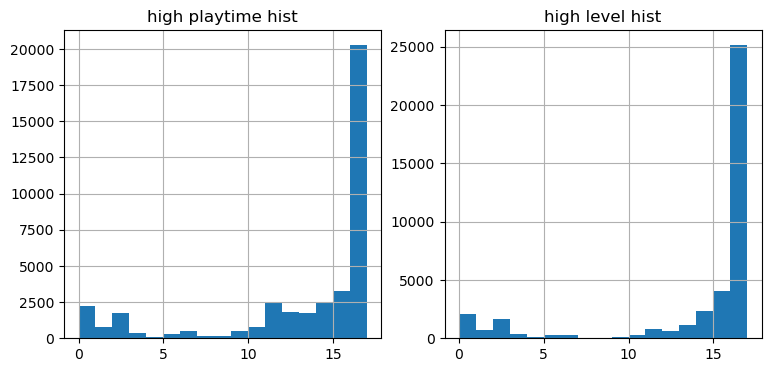

In [15]:
#acc_id 중 플레이타임이 가장 긴 char_id 기준 레벨분포 확인(high level hist와 비교) 
#전체 플레이 타임을 위한 sum과 level을 불러오기 위한 join 진행
#https://beneagain.tistory.com/14
activity_copy = activity.copy()
activity_copy = activity_copy.groupby(['acc_id','char_id'],as_index=False)['playtime'].sum().reset_index(drop=True)
activity_copy = pd.merge(activity_copy,combat,on=['acc_id','char_id'],how='left')
activity_copy.sort_values(by=['acc_id','playtime'],ascending=[False,False],inplace=True,ignore_index=True)
activity_copy.drop_duplicates(subset=['acc_id'],ignore_index=True,inplace=True)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axs[0].hist(activity_copy['level'],bins=17)
axs[0].set_title('high playtime hist')
axs[0].grid(True)
axs[1].hist(combat_copy['level'],bins=17)
axs[1].set_title('high level hist')
axs[1].grid(True)
plt.show()

In [ ]:
#타겟팅그룹 기준 선정
#acc_unique 확인 및 payment 분포와 상위 20%와의 매칭 확인 후 잘 맞는 그룹으로 선택



!!!!!!!!일단 구매력 분포 acc_id순으로 보고


target_group = 
comparison_group = 

# 가설1 